In [ ]:
#Name: jawad hassan
#roll:2230-0035
#BSAI
#PAI LAB FINAL

In [9]:
#libraries
import pandas as pd
import numpy as np



In [41]:
#Q1university Management system
from abc import ABC, abstractmethod

#Abstraction
class UniversityMember(ABC):
    def __init__(self, name):
        self.name = name  

    @abstractmethod
    def display_role(self):
        pass

#Encapsulation
class StaffMember:
    def __init__(self, name, salary):
        self.name = name
        self.__salary = salary

    
    def getter(self):
        return self.__salary

    def setter(self, value):
        if value >= 0:
            self.__salary = value
        else:
            print("salary should be positive")

#Inheritance
class Student(UniversityMember):
    def __init__(self, name, student_id):
        super().__init__(name)
        self.student_id = student_id
#Polymorphism
    def display_role(self):
        print("I am a Student. My ID is:")
        print(self.student_id)

class Teacher(UniversityMember):
    def __init__(self, name, subject):
        super().__init__(name)
        self.subject = subject
#Polymorphism
    def display_role(self):
        print("I am a Teacher. I teach:",self.subject)

#Function
def show_details(member):
    member.display_role()

s = Student("jawad", "2230-0035")
t = Teacher("Salma", "pai")

show_details(s)
show_details(t)

I am a Student. My ID is:
2230-0035
I am a Teacher. I teach: pai


In [42]:
#Q3 Climate Data Analysis


#Array Creation
data = [
    [22, 25, 19, 21, 24, 28, 26],
    [24, 22, 23, 25, 27, 30, 29],
    [18, 20, 22, 19, 21, 23, 22],
    [25, 27, 26, 28, 29, 31, 32]
      ] 
temp = np.array(data)

#Basic Operations & Broadcasting
temp = temp + 2
print(temp)
temp_fahrenheit = (temp * 9/5) + 32
print(temp_fahrenheit)
#Slicing and Indexing
weekend = temp[:, 5:] 
print(weekend)
wed = temp[2, 2]
print(wed)
#Statistical Analysis
avgweek = np.mean(temp, axis=1) 
print(avgweek)
maxtemp = np.max(temp)
print(maxtemp)
days25 = np.sum(temp > 25)
print(days25)
#Data Reshaping
flat_temp = temp.flatten()

flat_temp[flat_temp < 20] = 20
print(flat_temp)

[[24 27 21 23 26 30 28]
 [26 24 25 27 29 32 31]
 [20 22 24 21 23 25 24]
 [27 29 28 30 31 33 34]]
[[75.2 80.6 69.8 73.4 78.8 86.  82.4]
 [78.8 75.2 77.  80.6 84.2 89.6 87.8]
 [68.  71.6 75.2 69.8 73.4 77.  75.2]
 [80.6 84.2 82.4 86.  87.8 91.4 93.2]]
[[30 28]
 [32 31]
 [25 24]
 [33 34]]
24
[25.57142857 27.71428571 22.71428571 30.28571429]
34
16
[24 27 21 23 26 30 28 26 24 25 27 29 32 31 20 22 24 21 23 25 24 27 29 28
 30 31 33 34]


In [43]:
#Q2 EDA
df=pd.read_csv(r"C:\Users\dell\Desktop\Data2.csv")
df.head()
df.info()
df.describe()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        17534 non-null  object 
 1   Customer ID     17534 non-null  object 
 2   Category        17534 non-null  object 
 3   Item            15776 non-null  object 
 4   Price           16658 non-null  float64
 5   Quantity        17104 non-null  float64
 6   Order Total     17104 non-null  float64
 7   Order Date      17534 non-null  object 
 8   Payment Method  16452 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.2+ MB
Order ID             0
Customer ID          0
Category             0
Item              1758
Price              876
Quantity           430
Order Total        430
Order Date           0
Payment Method    1082
dtype: int64


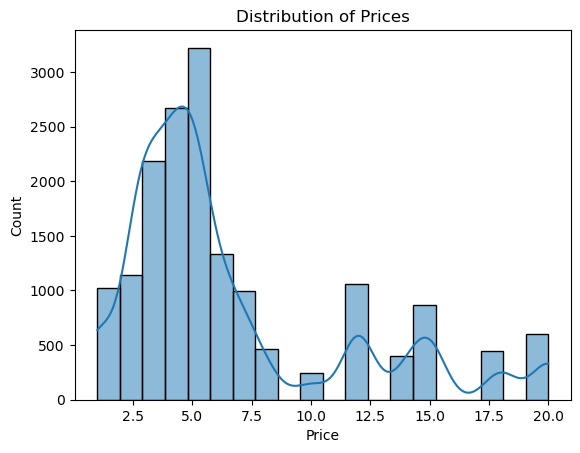

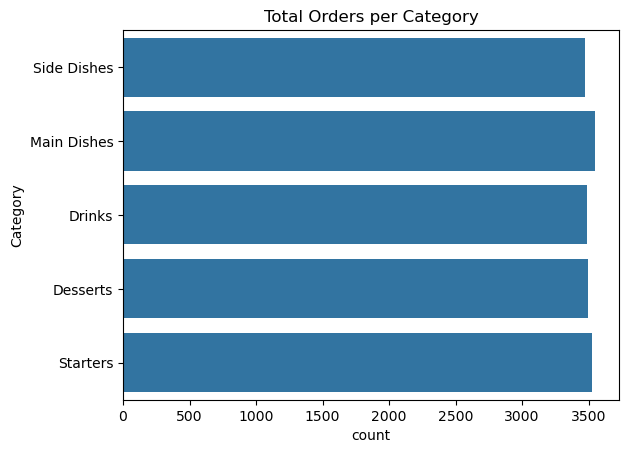

In [44]:
#univariate dist
import seaborn as sns
import matplotlib.pyplot as plt
#Numerical Univariate 
sns.histplot(df['Price'].dropna(), bins=20, kde=True)
plt.title('Distribution of Prices')
plt.show()

#Categorical Univariate 
sns.countplot(y='Category', data=df)
plt.title('Total Orders per Category')
plt.show()

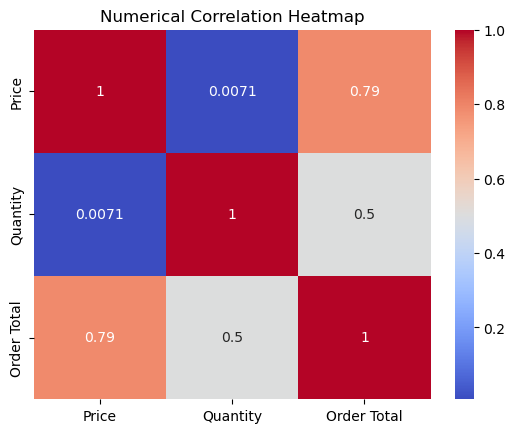

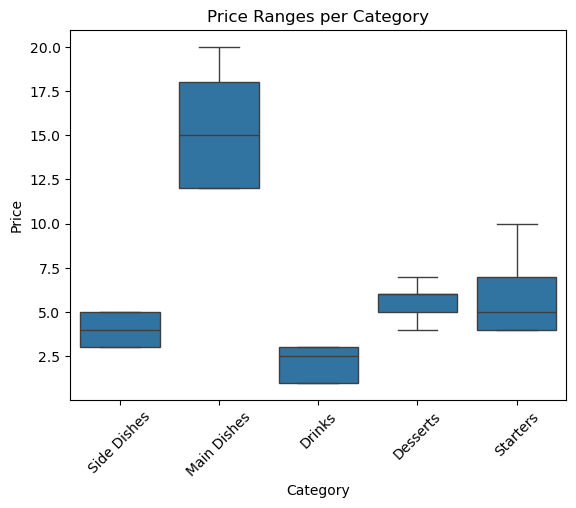

In [45]:
#multi variate
# Numerical Correlation
correlation = df[['Price', 'Quantity', 'Order Total']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Numerical Correlation Heatmap')
plt.show()

#Categorical vs Numerical (Price by Category)
sns.boxplot(x='Category', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price Ranges per Category')
plt.show()

In [48]:
#preprocess
from sklearn.preprocessing import LabelEncoder
# Numerical columns Filling with the Mean
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
df['Order Total'] = df['Order Total'].fillna(df['Order Total'].mean())

# Categorical columns Filling with the Mode 
df['Item'] = df['Item'].fillna(df['Item'].mode()[0])
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode()[0])

le = LabelEncoder()
df['Item_Encoded'] = le.fit_transform(df['Item'])

# One-Hot Encoding 
dfprocess = pd.get_dummies(df, columns=['Category', 'Payment Method'], drop_first=True)

dfprocess.to_csv('newdata.csv', index=False)

# Verification
print("Missing values after preprocessing:")
print(dfprocess.isnull().sum())
print("\nNew columns created:")
print(dfprocess.columns.tolist())

Missing values after preprocessing:
Order ID                         0
Customer ID                      0
Item                             0
Price                            0
Quantity                         0
Order Total                      0
Order Date                       0
Item_Encoded                     0
Category_Drinks                  0
Category_Main Dishes             0
Category_Side Dishes             0
Category_Starters                0
Payment Method_Credit Card       0
Payment Method_Digital Wallet    0
dtype: int64

New columns created:
['Order ID', 'Customer ID', 'Item', 'Price', 'Quantity', 'Order Total', 'Order Date', 'Item_Encoded', 'Category_Drinks', 'Category_Main Dishes', 'Category_Side Dishes', 'Category_Starters', 'Payment Method_Credit Card', 'Payment Method_Digital Wallet']
